In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# Task 1: PCA and Logistic Regression
#Step 1: Load and Preprocess CIFAR-10 Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert to grayscale
x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

# Flatten the images
x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)

# Normalize the data
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)


#Step 2: Standard PCA
Perform PCA to retain 95% of the variance.

In [ ]:
# Standard PCA
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

print(f"Number of components selected: {pca.n_components_}")


Number of components selected: 163


#Step 3: Logistic Regression and ROC Curve
Train a logistic regression classifier and plot the ROC curve.

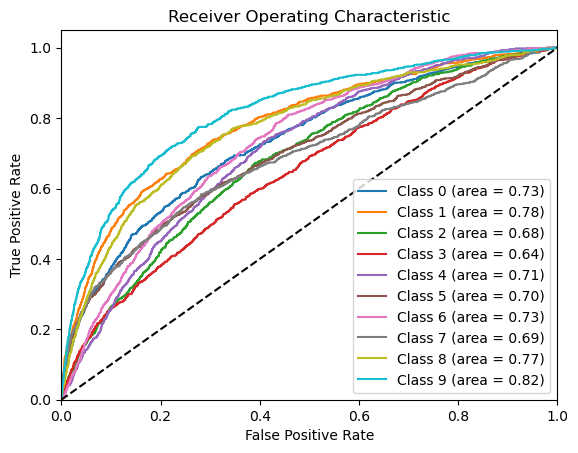

In [ ]:
# Logistic Regression
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train_pca, y_train.ravel())

# Predict probabilities for the test set
y_score = clf.predict_proba(x_test_pca)

# Calculate ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#Step 4: Randomized PCA
Perform randomized PCA and compare the results.

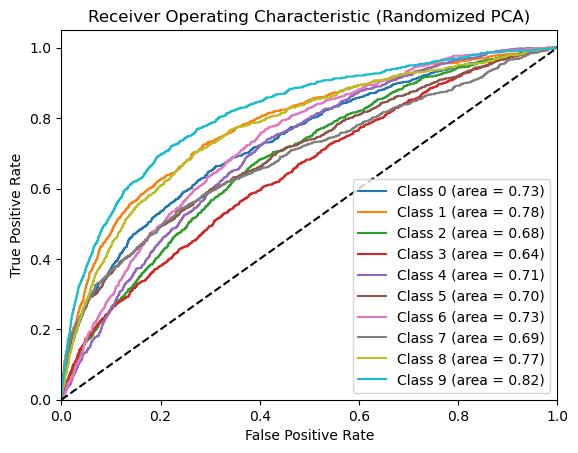

In [ ]:
# Randomized PCA (Truncated SVD)
randomized_pca = TruncatedSVD(n_components=pca.n_components_)
x_train_rpca = randomized_pca.fit_transform(x_train_flat)
x_test_rpca = randomized_pca.transform(x_test_flat)

# Logistic Regression
clf_rpca = LogisticRegression(max_iter=10000)
clf_rpca.fit(x_train_rpca, y_train.ravel())

# Predict probabilities for the test set
y_score_rpca = clf_rpca.predict_proba(x_test_rpca)

# Calculate ROC curve and ROC area for each class
fpr_rpca = {}
tpr_rpca = {}
roc_auc_rpca = {}
for i in range(10):
    fpr_rpca[i], tpr_rpca[i], _ = roc_curve(y_test == i, y_score_rpca[:, i])
    roc_auc_rpca[i] = auc(fpr_rpca[i], tpr_rpca[i])

# Plot ROC curves for Randomized PCA
plt.figure()
for i in range(10):
    plt.plot(fpr_rpca[i], tpr_rpca[i], label=f'Class {i} (area = {roc_auc_rpca[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Randomized PCA)')
plt.legend(loc="lower right")
plt.show()


Comparison
Compare the ROC curves and AUC scores of the standard PCA and randomized PCA.

In [ ]:
for i in range(10):
    print(f"Class {i} - Standard PCA AUC: {roc_auc[i]:.2f}, Randomized PCA AUC: {roc_auc_rpca[i]:.2f}")


Class 0 - Standard PCA AUC: 0.73, Randomized PCA AUC: 0.73
Class 1 - Standard PCA AUC: 0.78, Randomized PCA AUC: 0.78
Class 2 - Standard PCA AUC: 0.68, Randomized PCA AUC: 0.68
Class 3 - Standard PCA AUC: 0.64, Randomized PCA AUC: 0.64
Class 4 - Standard PCA AUC: 0.71, Randomized PCA AUC: 0.71
Class 5 - Standard PCA AUC: 0.70, Randomized PCA AUC: 0.70
Class 6 - Standard PCA AUC: 0.73, Randomized PCA AUC: 0.73
Class 7 - Standard PCA AUC: 0.69, Randomized PCA AUC: 0.69
Class 8 - Standard PCA AUC: 0.77, Randomized PCA AUC: 0.77
Class 9 - Standard PCA AUC: 0.82, Randomized PCA AUC: 0.82


# Task 2: Single Layer Autoencoder
Step 1: Train a Single Layer Autoencoder
Train a single layer autoencoder with a linear activation function and normalize the input.    

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# Define the autoencoder
input_img = Input(shape=(x_train_flat.shape[1],))
encoded = Dense(pca.n_components_, activation='linear')(input_img)
decoded = Dense(x_train_flat.shape[1], activation='linear')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(x_train_flat, x_train_flat,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))



Epoch 1/50

196/196 [==============================] - 6s 22ms/step - loss: 0.2697 - val_loss: 0.1248
Epoch 2/50
196/196 [==============================] - 3s 18ms/step - loss: 0.0993 - val_loss: 0.0820
Epoch 3/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0731 - val_loss: 0.0665
Epoch 4/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0626 - val_loss: 0.0595
Epoch 5/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0575 - val_loss: 0.0560
Epoch 6/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0550 - val_loss: 0.0544
Epoch 7/50
196/196 [==============================] - 4s 20ms/step - loss: 0.0543 - val_loss: 0.0534
Epoch 8/50
196/196 [==============================] - 4s 20ms/step - loss: 0.0531 - val_loss: 0.0531
Epoch 9/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0528 - val_loss: 0.0528
Epoch 10/50
196/196 [==============================] - 6s 33ms/step - loss: 0.0525 - val_

Step 2: Compare Eigenvectors
Extract the learned weights and compare them with the PCA components.

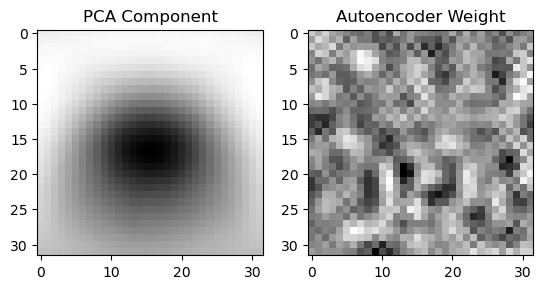

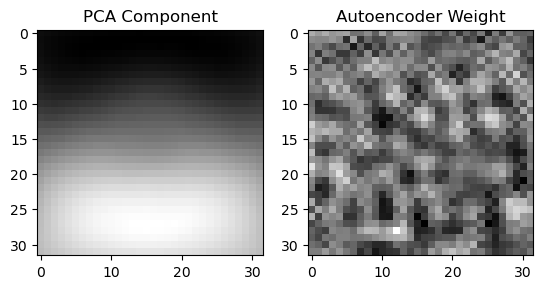

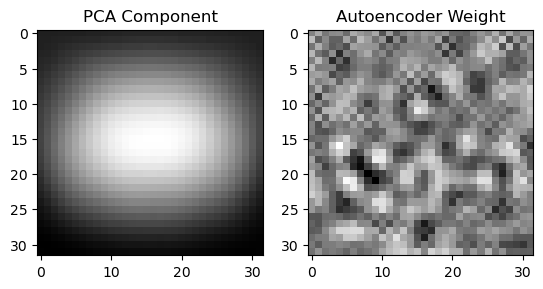

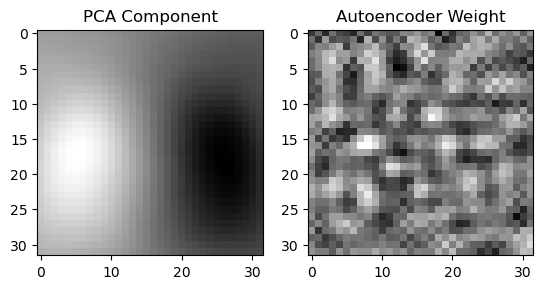

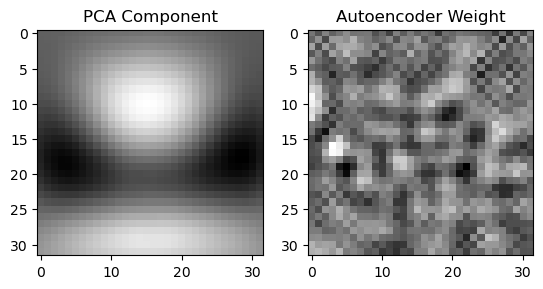

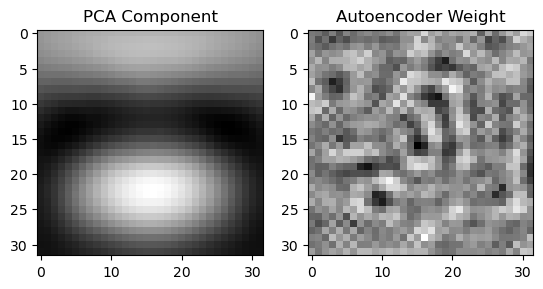

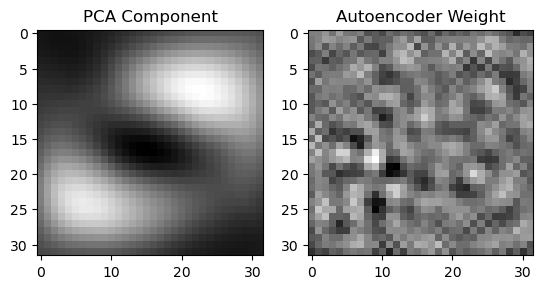

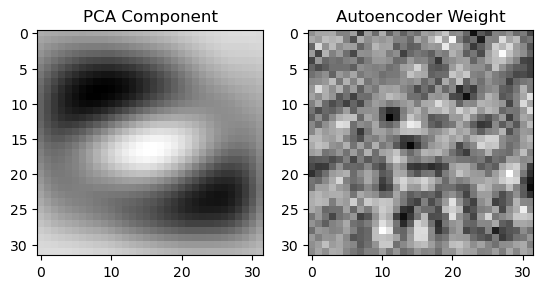

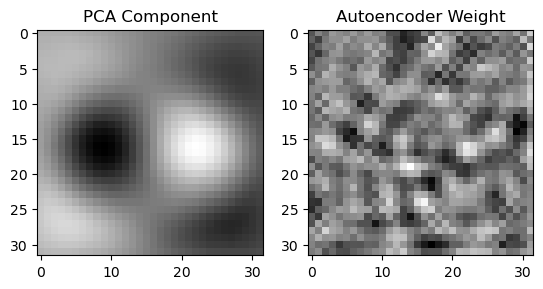

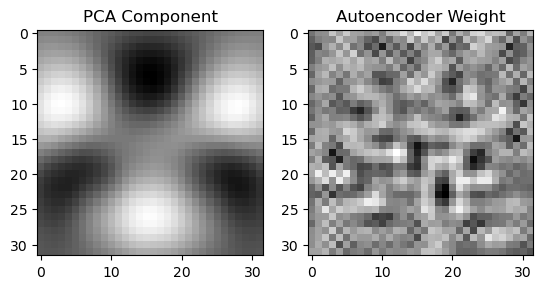

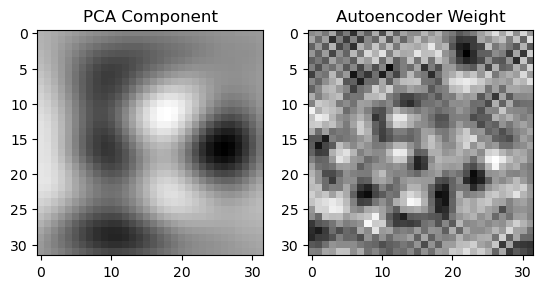

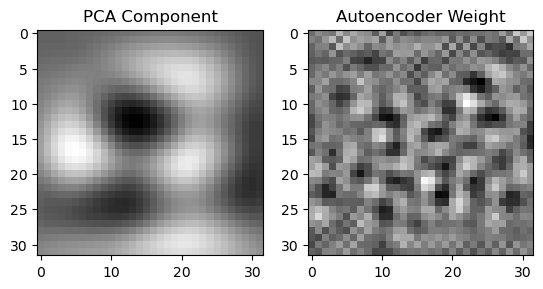

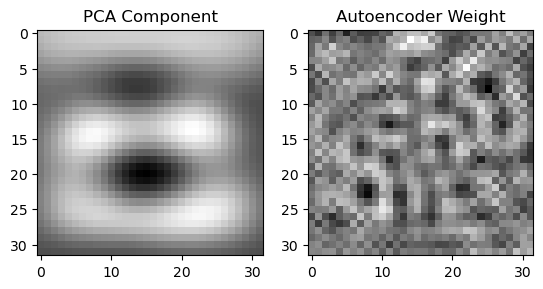

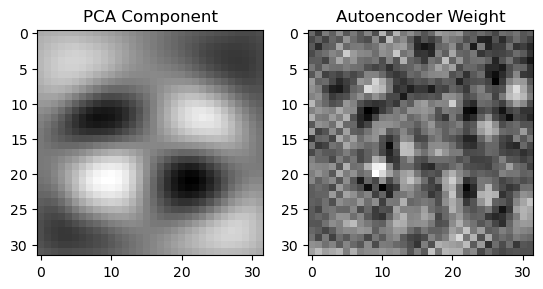

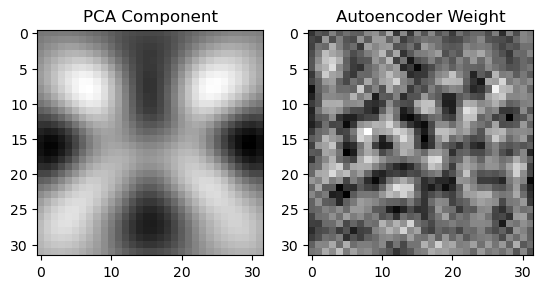

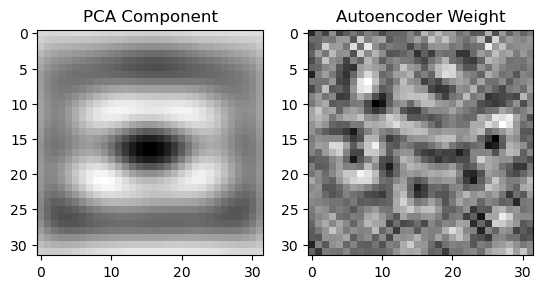

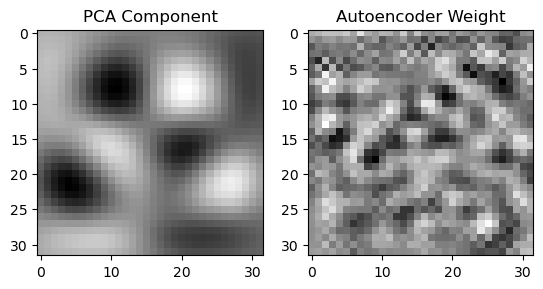

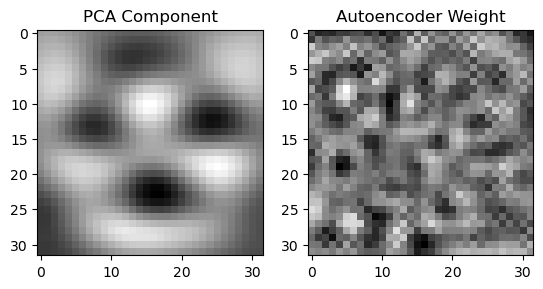

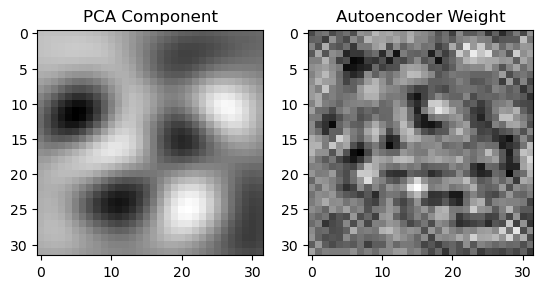

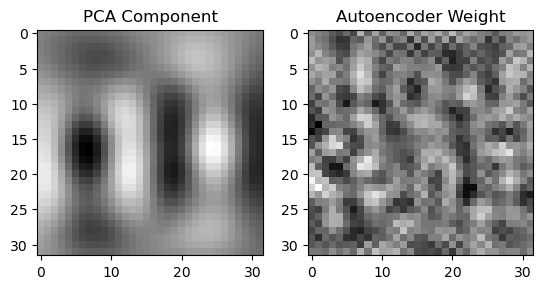

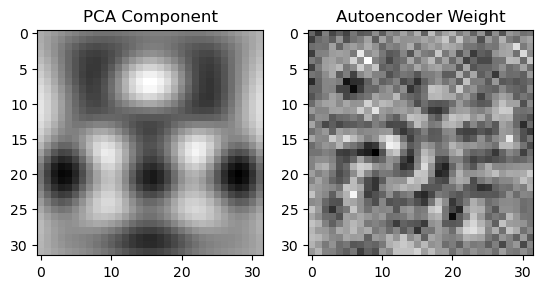

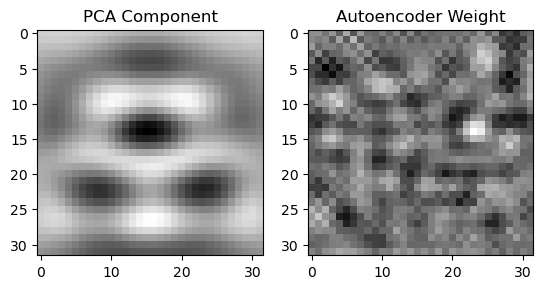

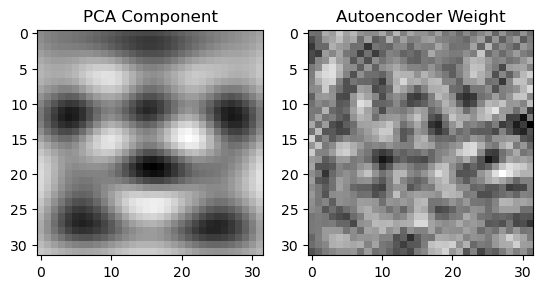

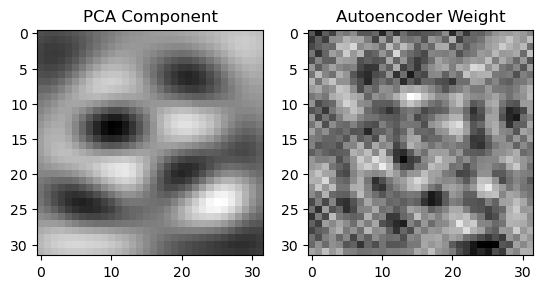

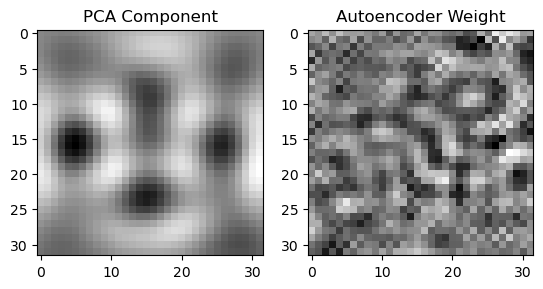

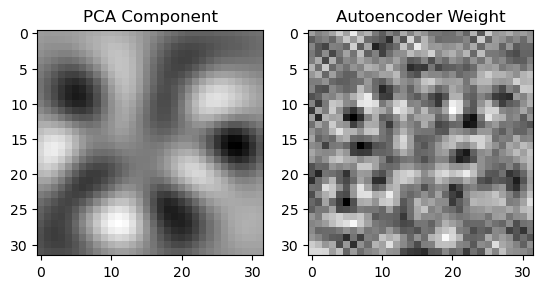

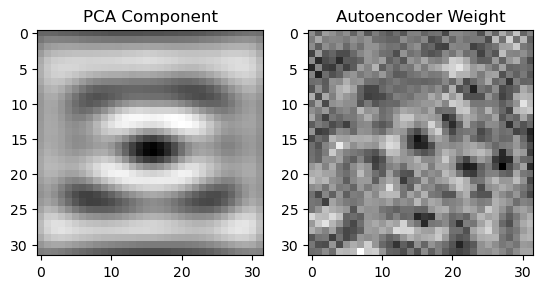

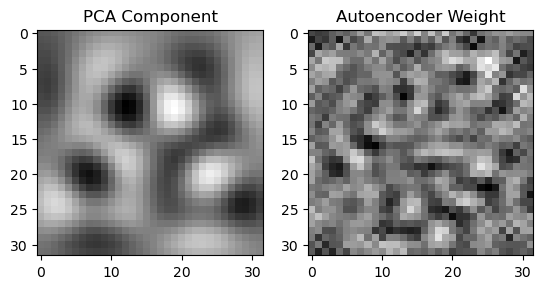

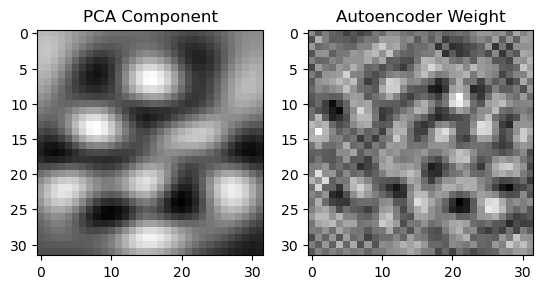

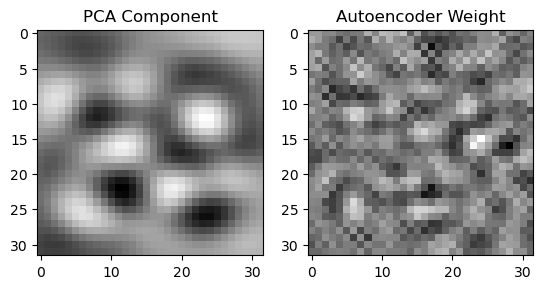

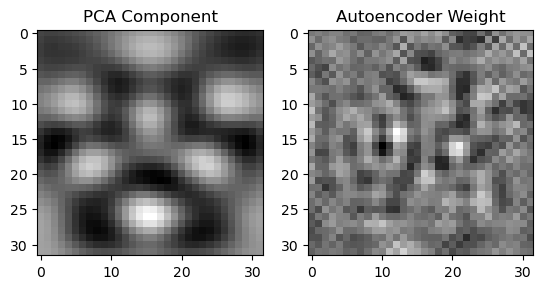

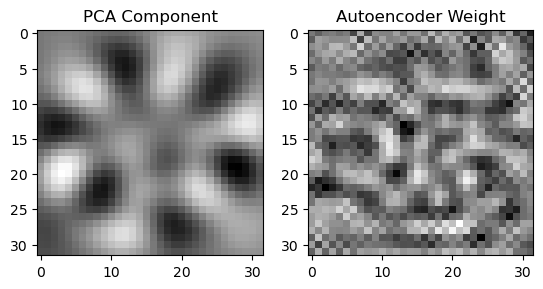

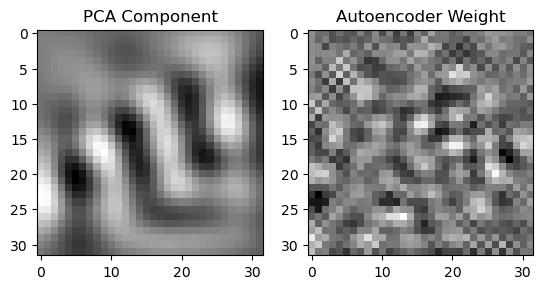

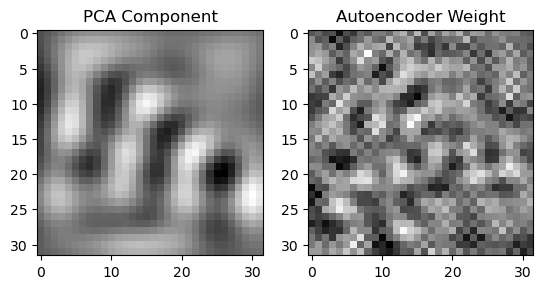

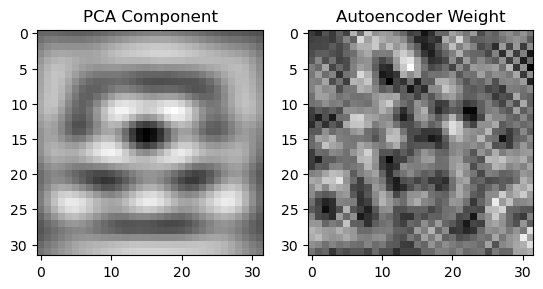

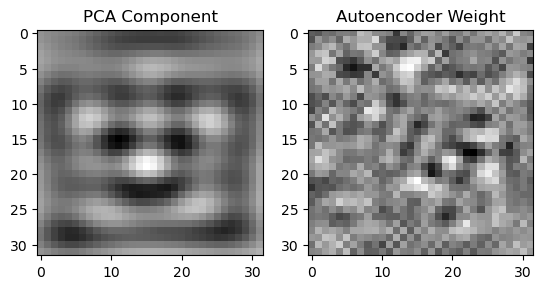

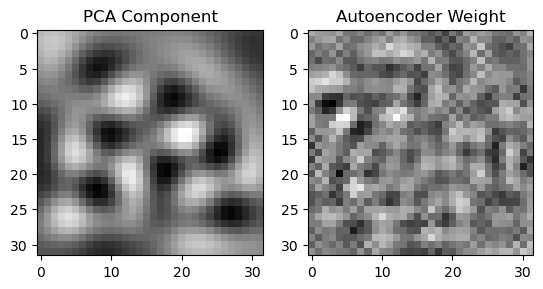

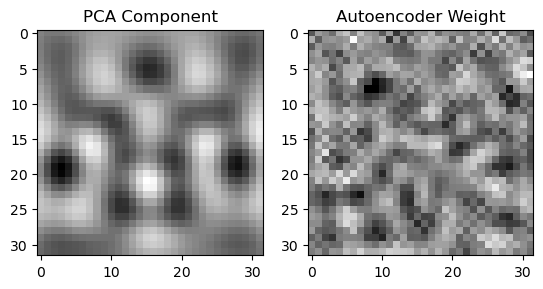

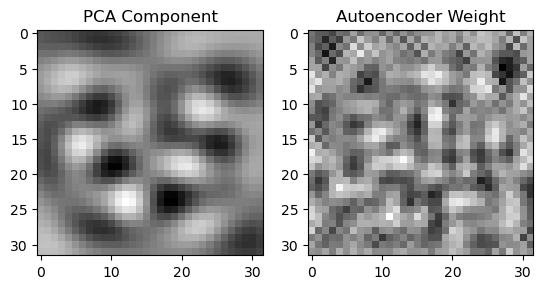

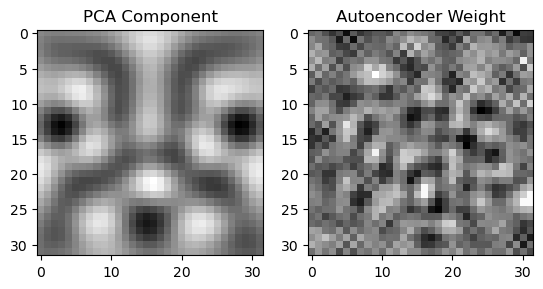

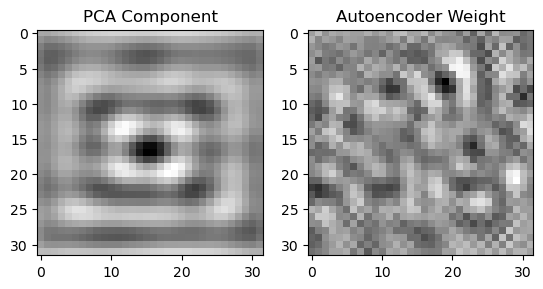

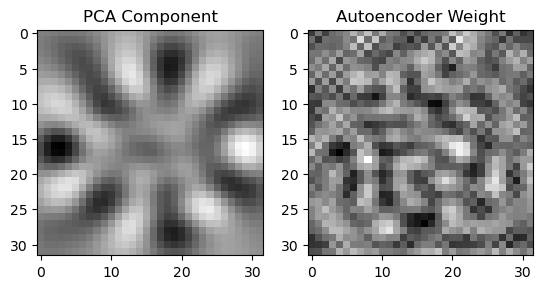

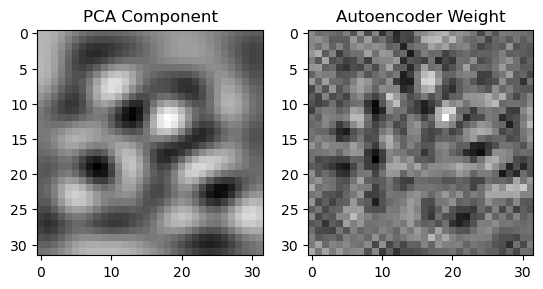

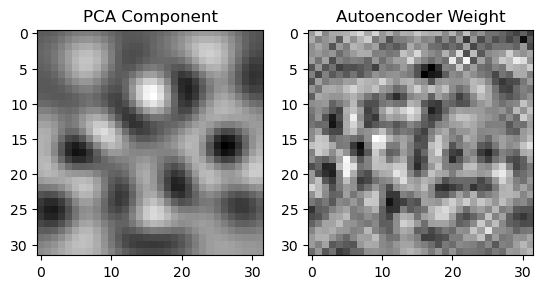

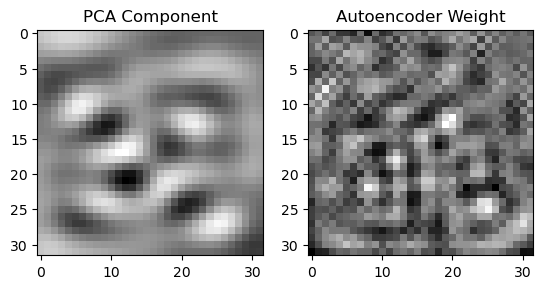

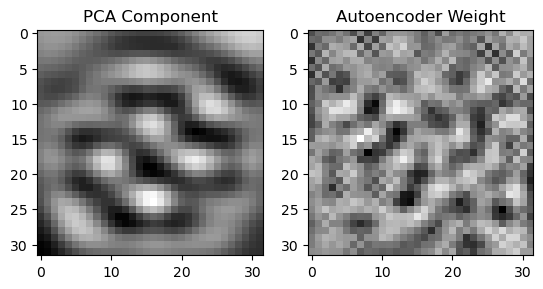

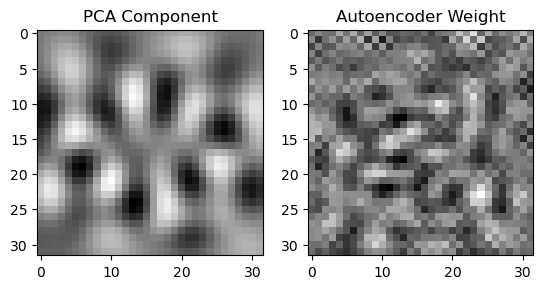

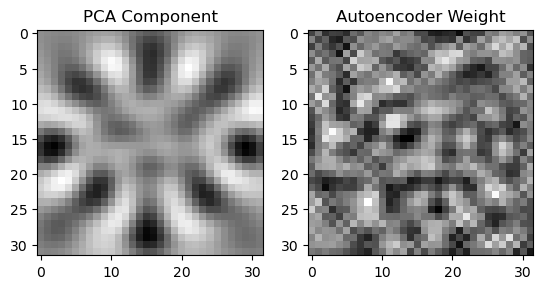

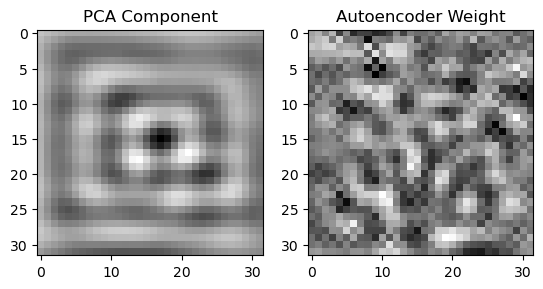

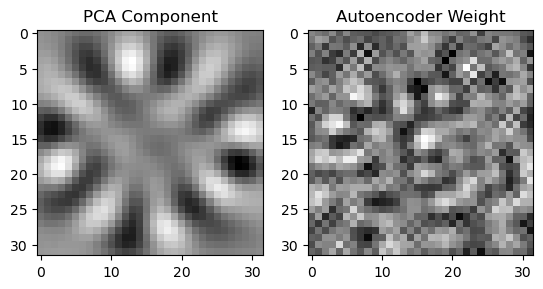

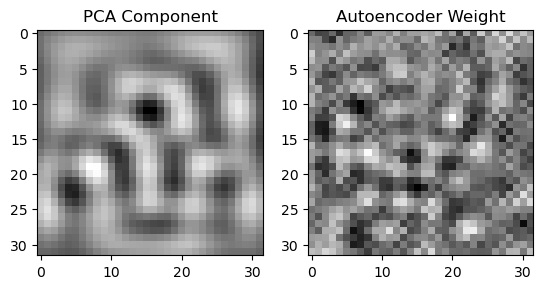

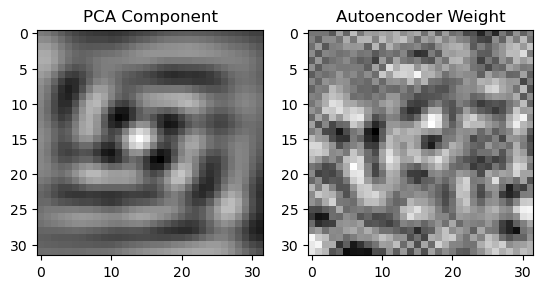

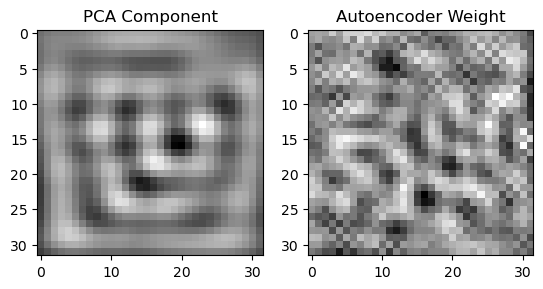

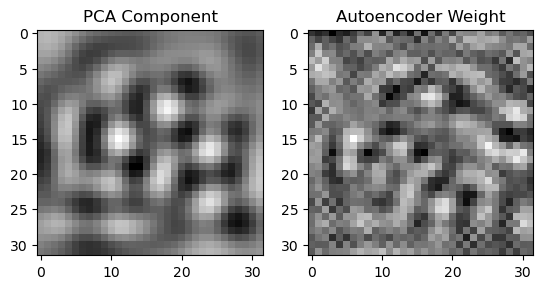

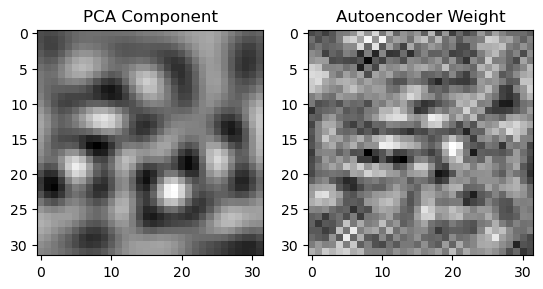

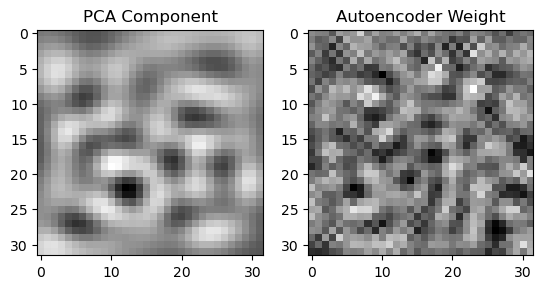

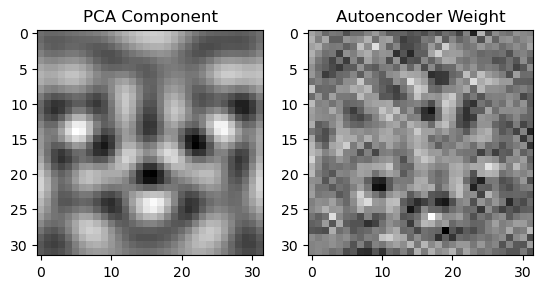

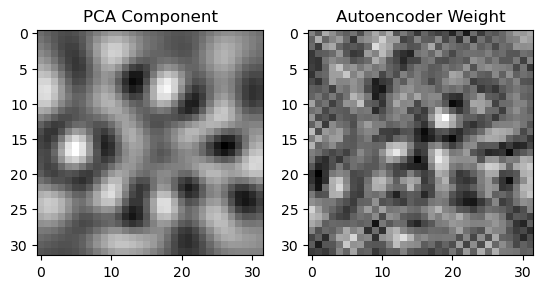

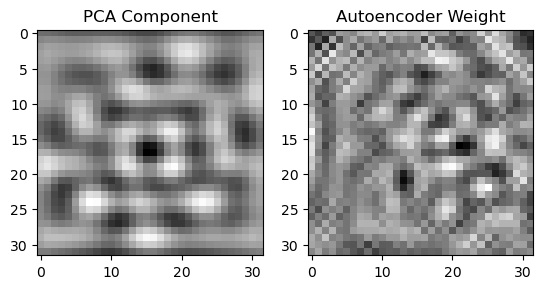

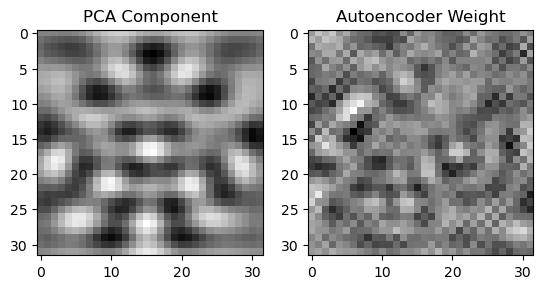

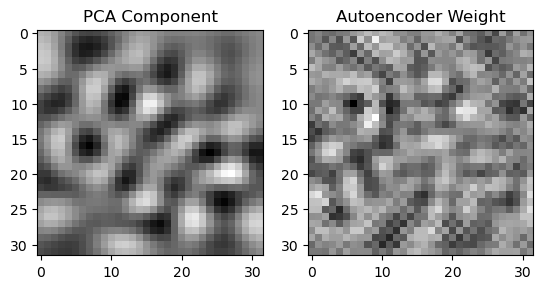

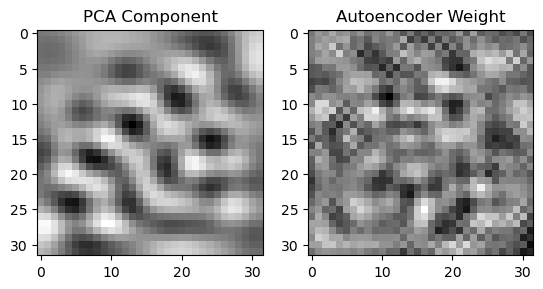

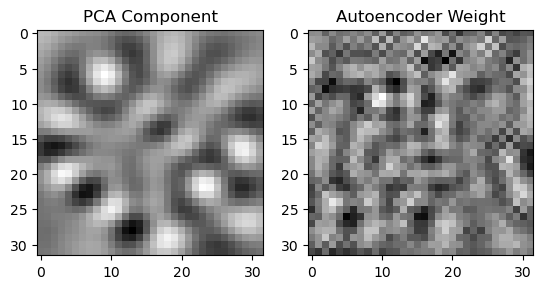

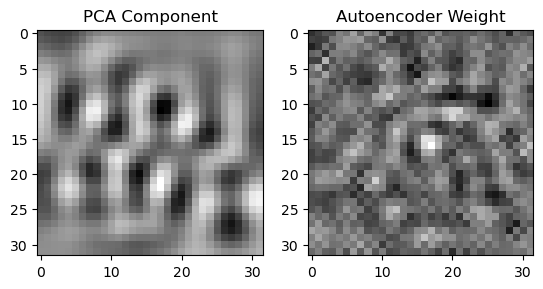

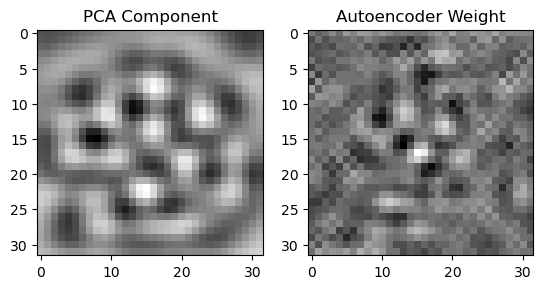

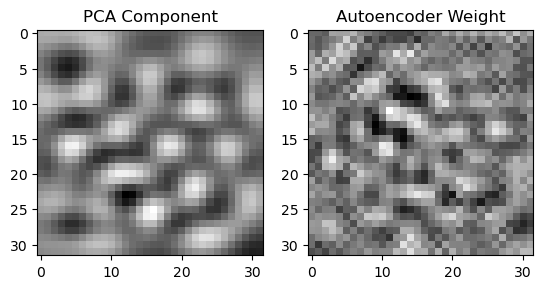

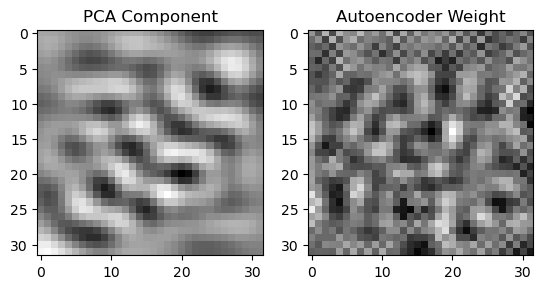

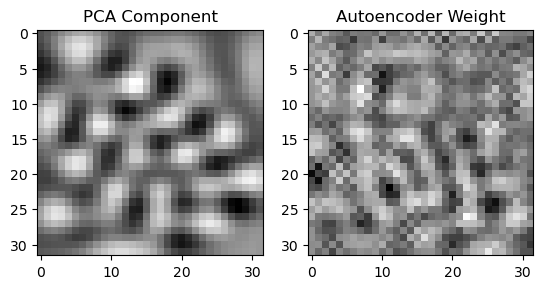

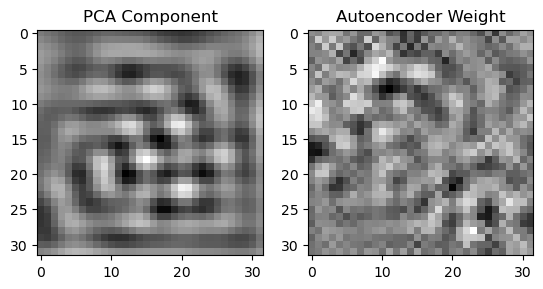

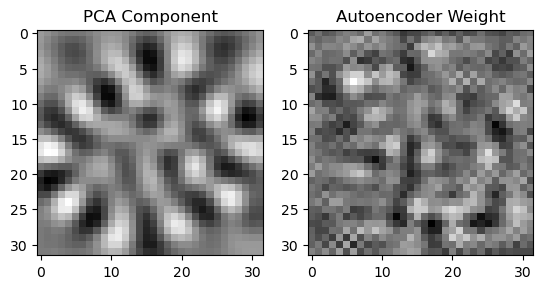

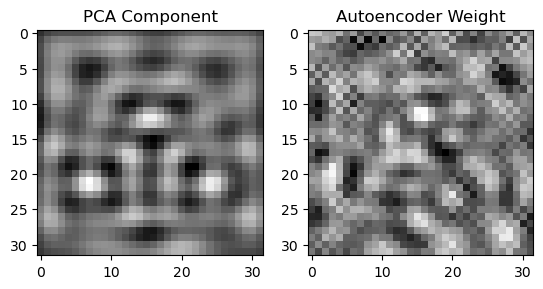

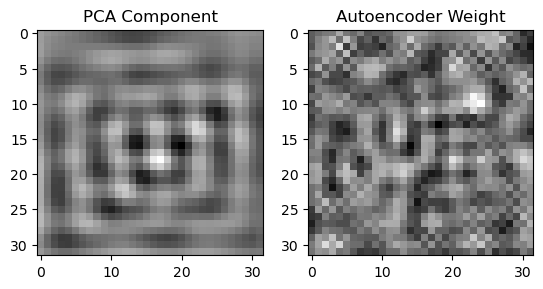

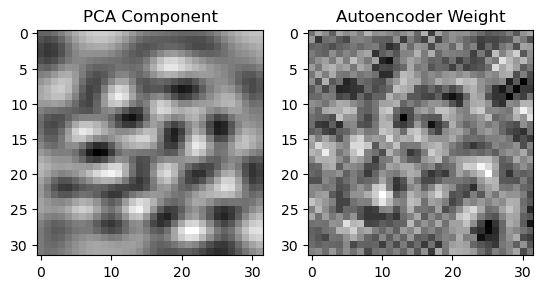

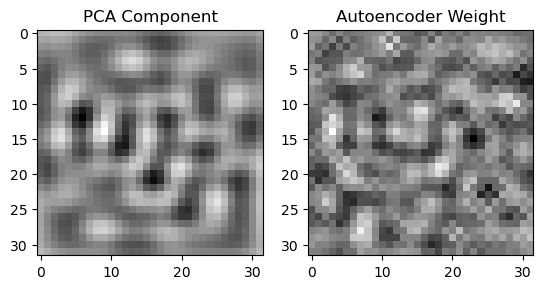

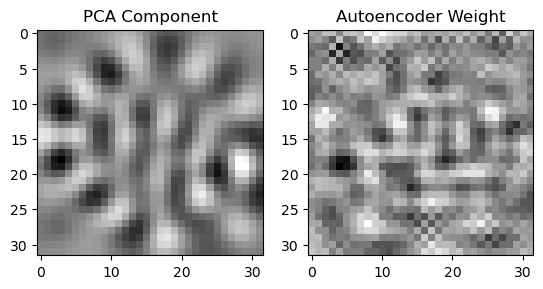

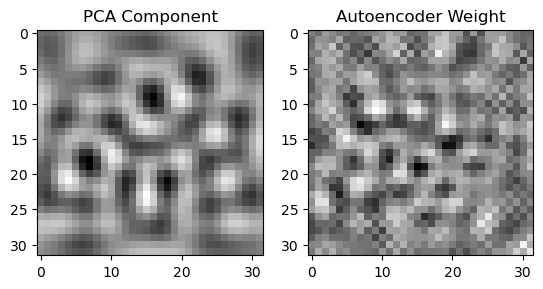

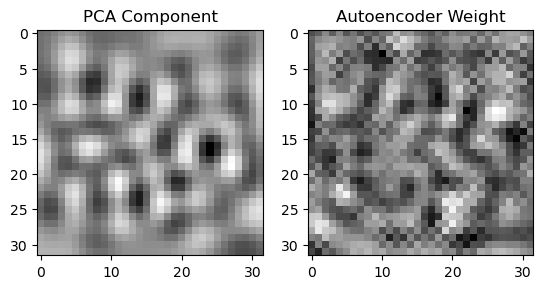

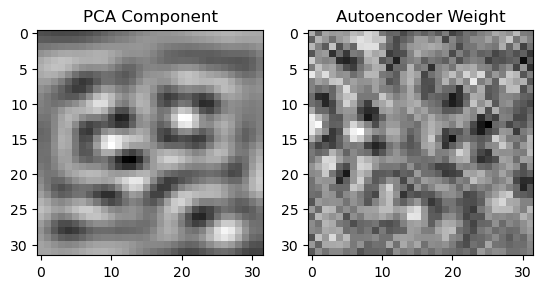

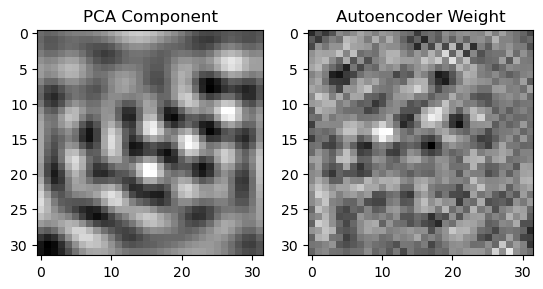

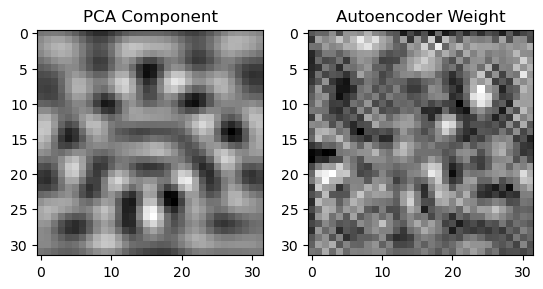

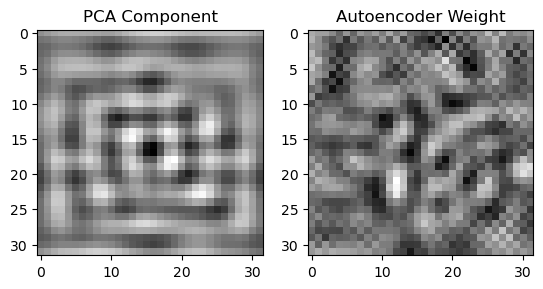

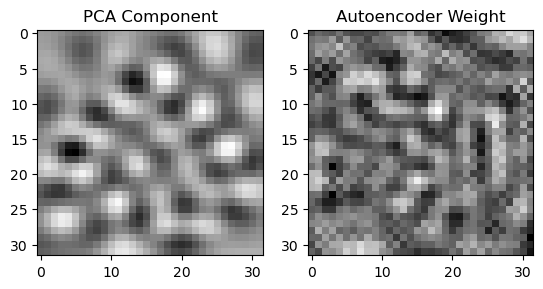

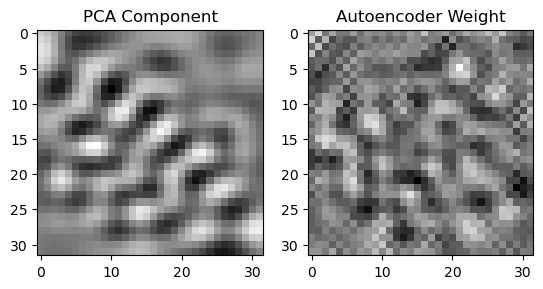

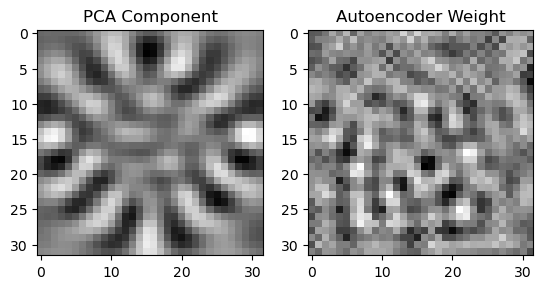

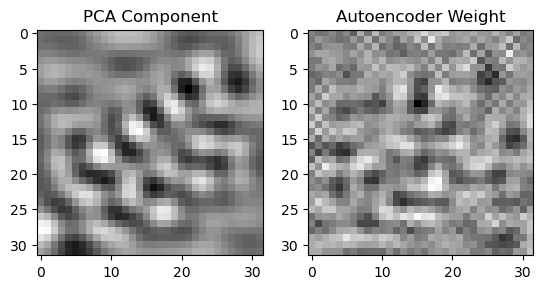

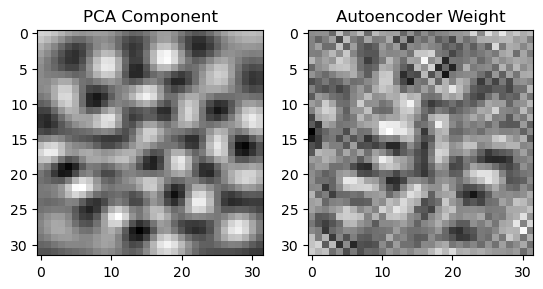

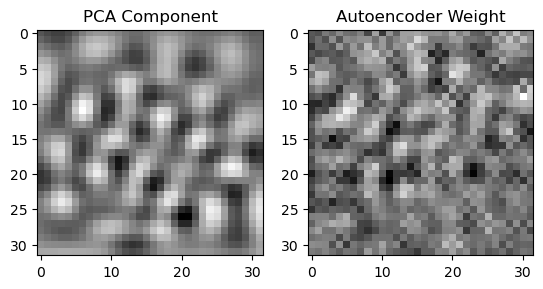

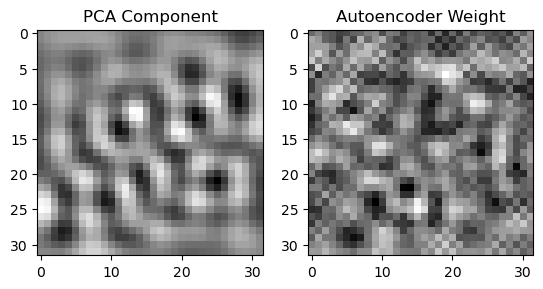

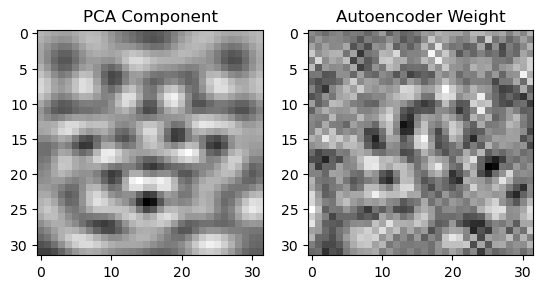

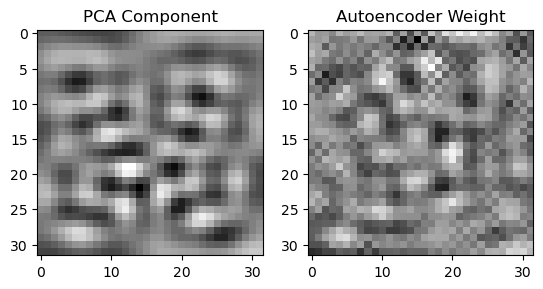

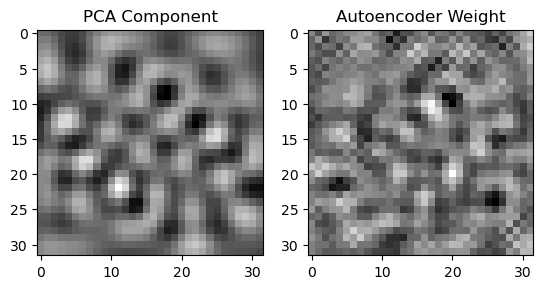

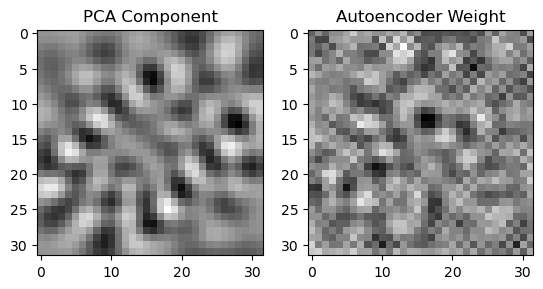

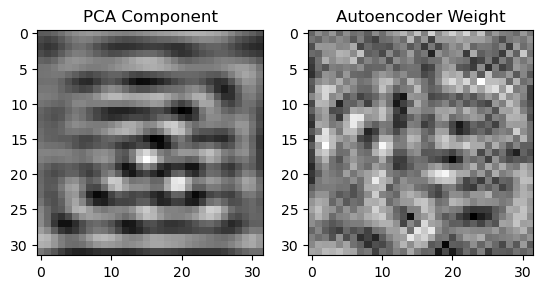

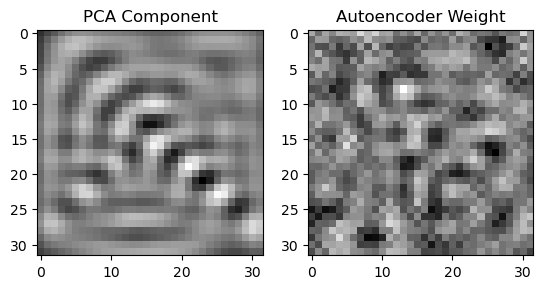

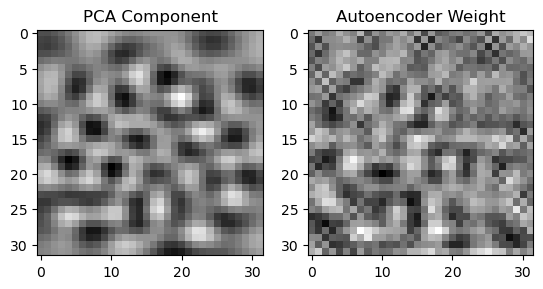

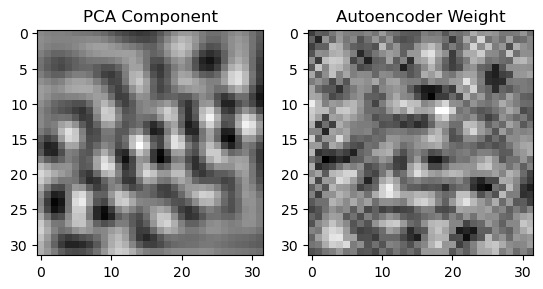

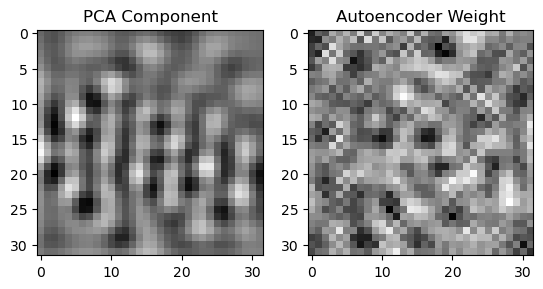

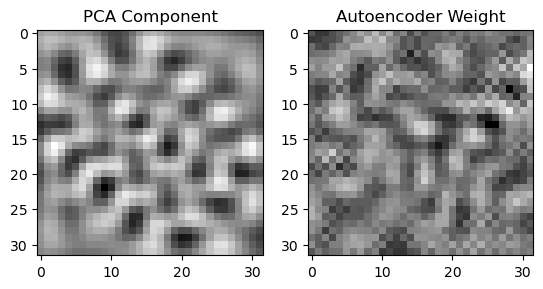

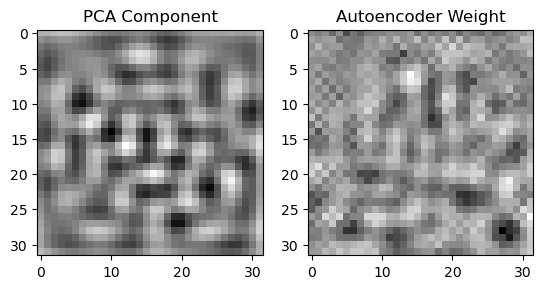

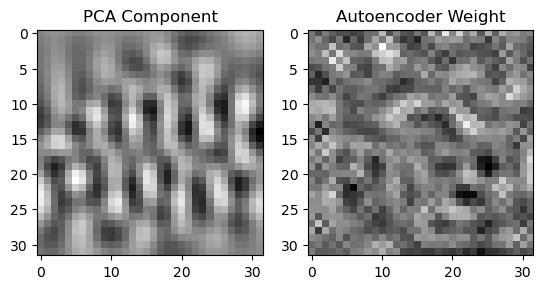

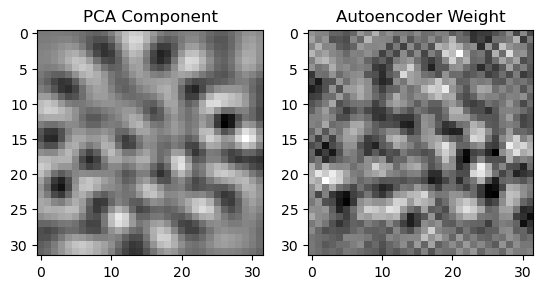

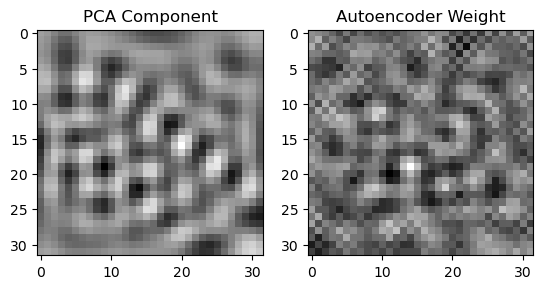

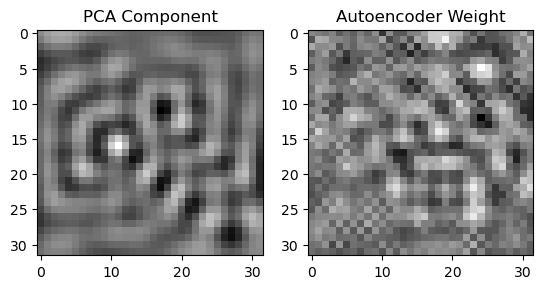

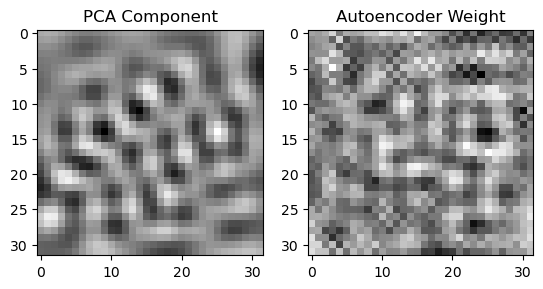

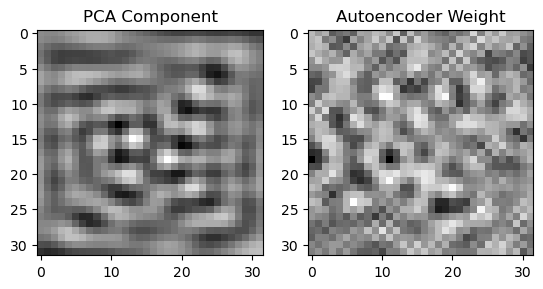

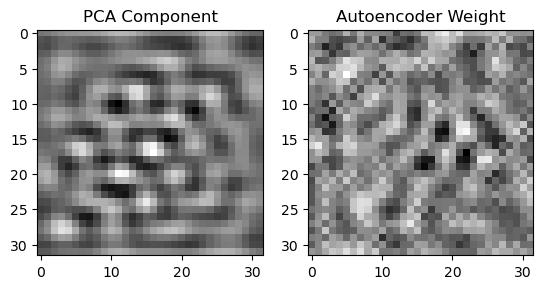

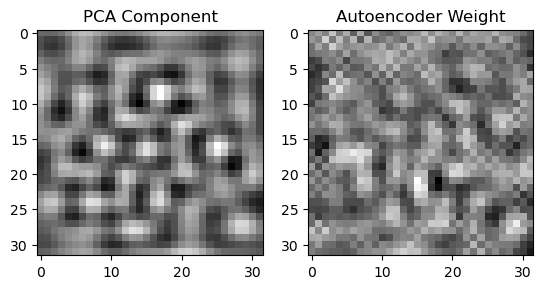

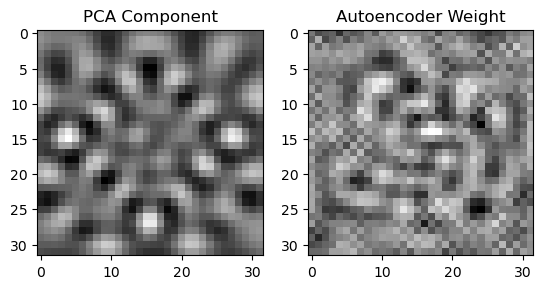

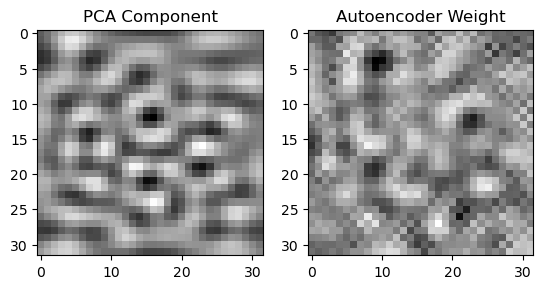

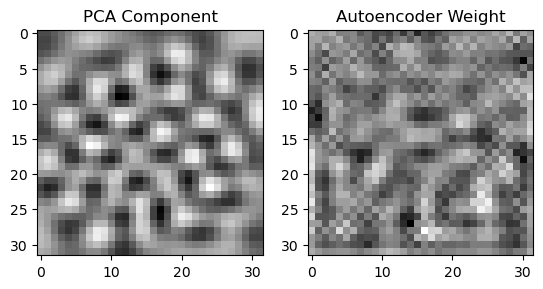

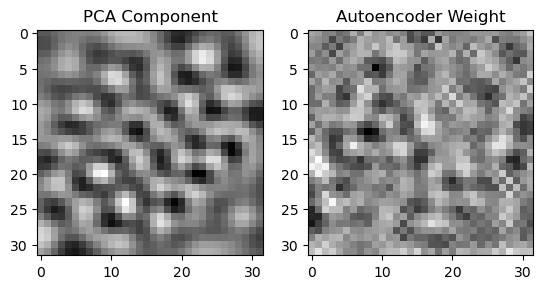

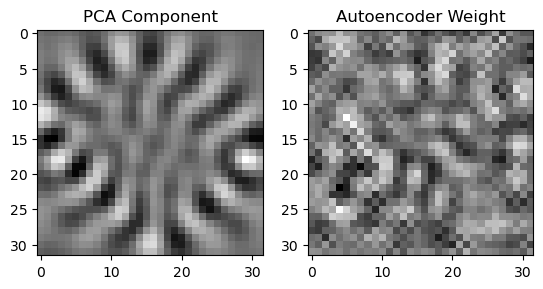

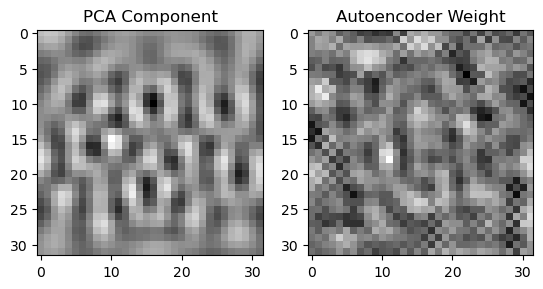

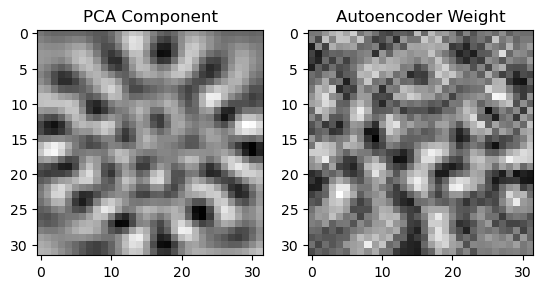

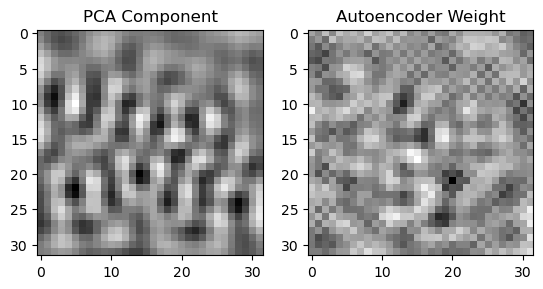

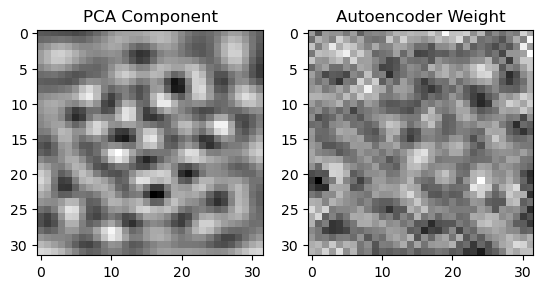

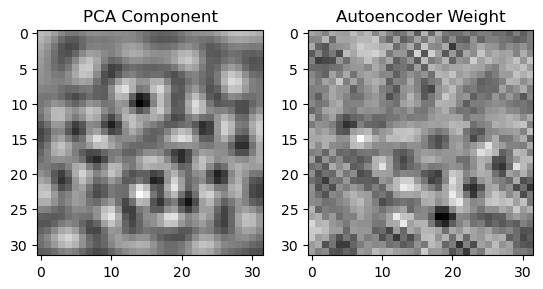

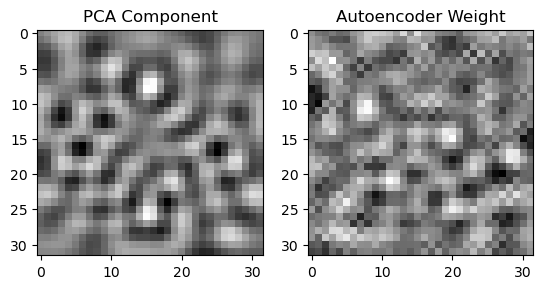

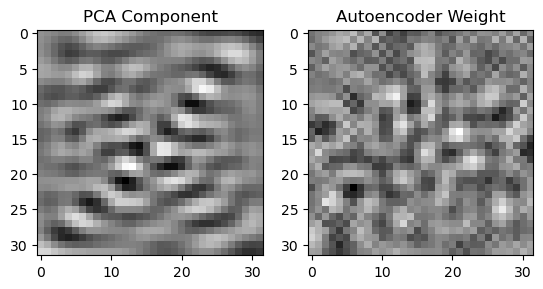

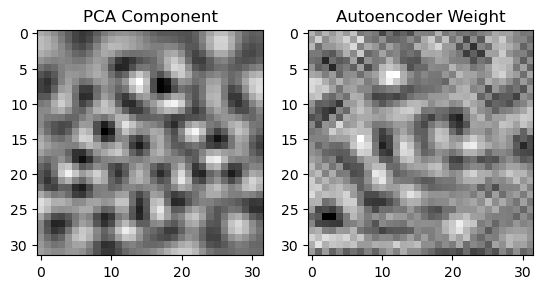

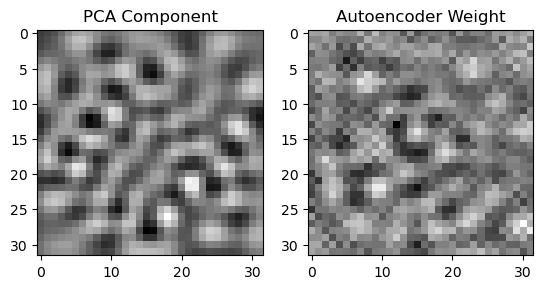

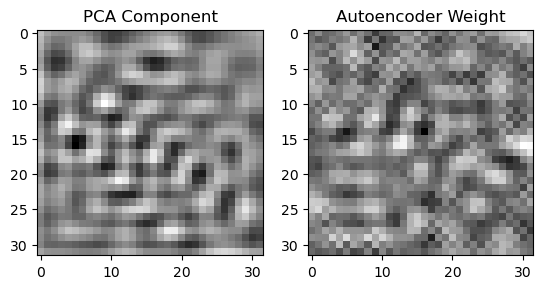

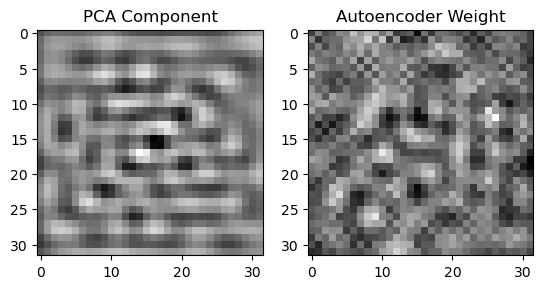

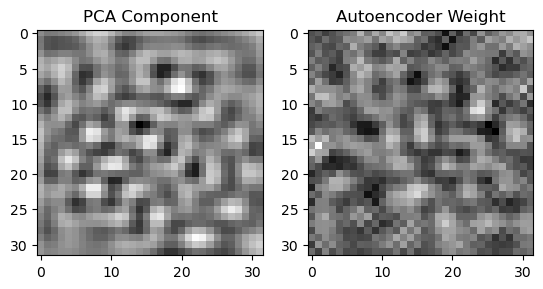

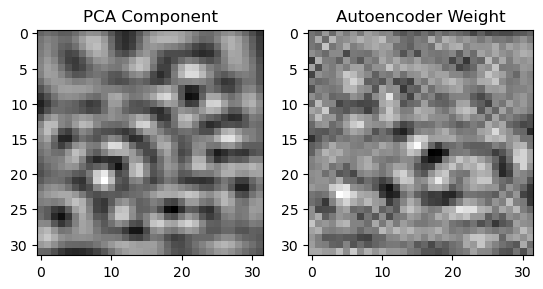

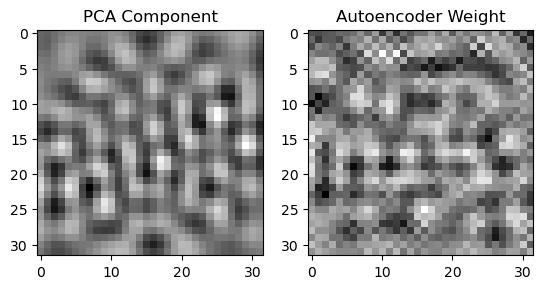

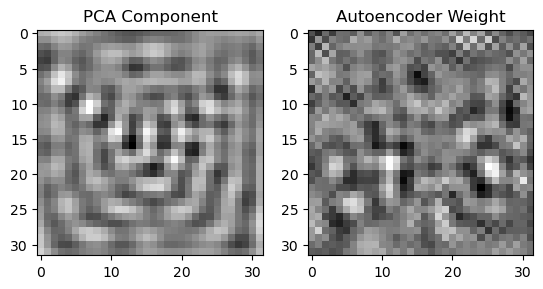

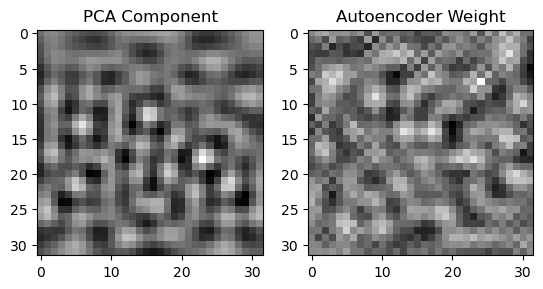

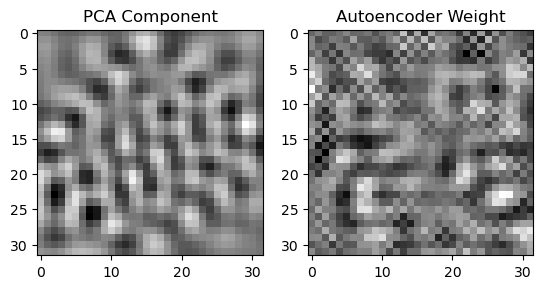

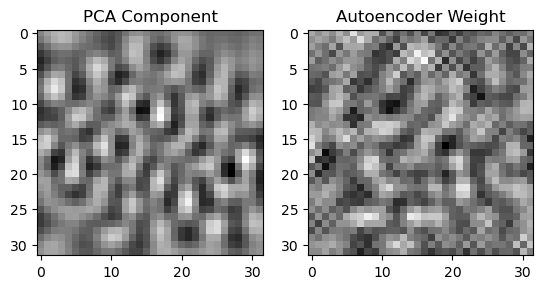

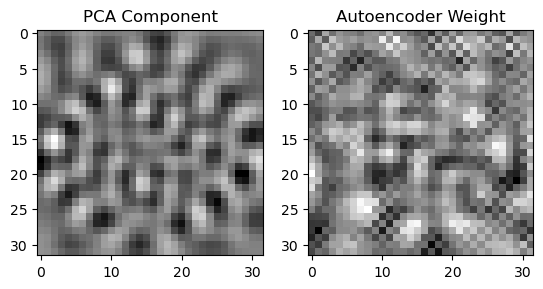

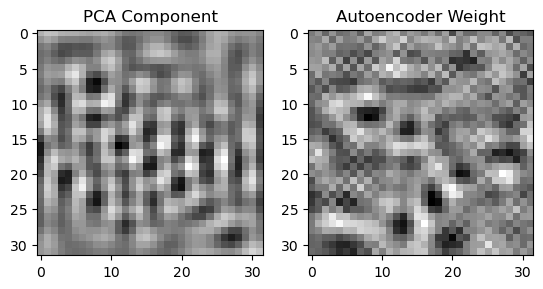

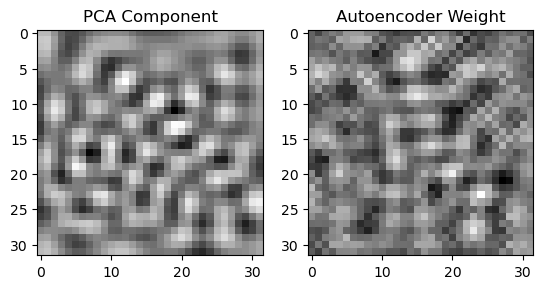

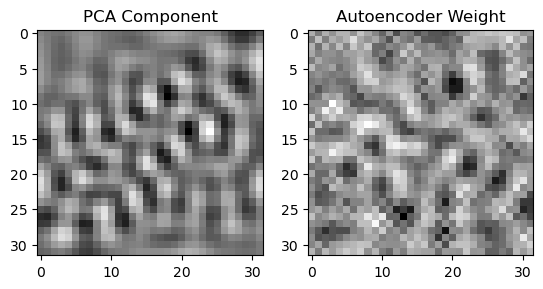

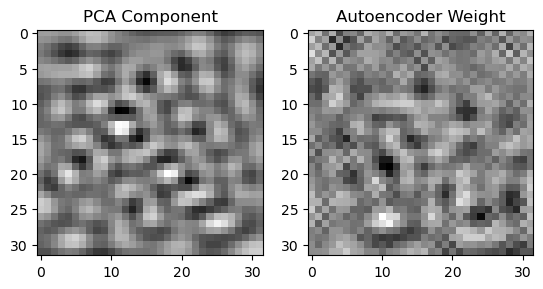

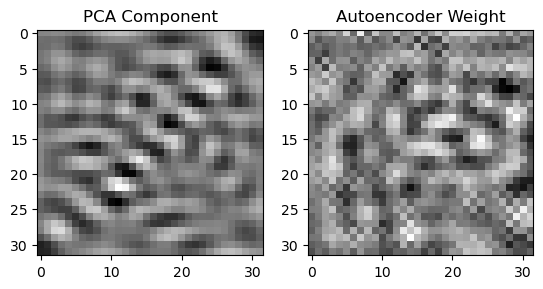

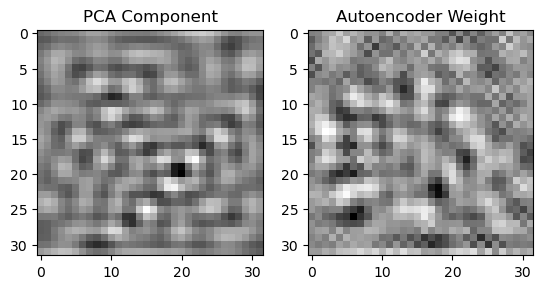

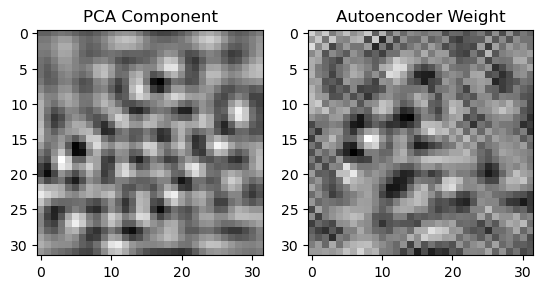

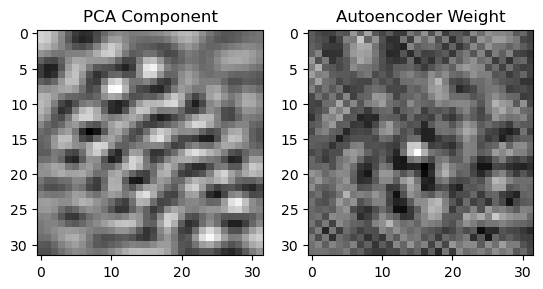

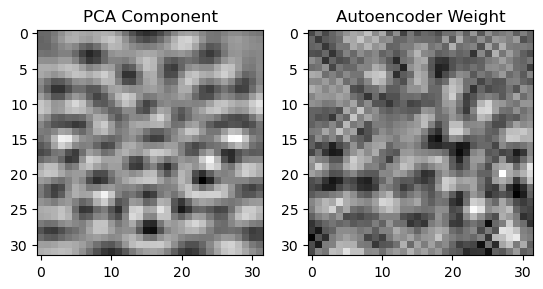

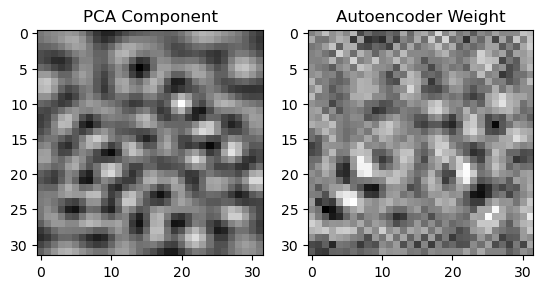

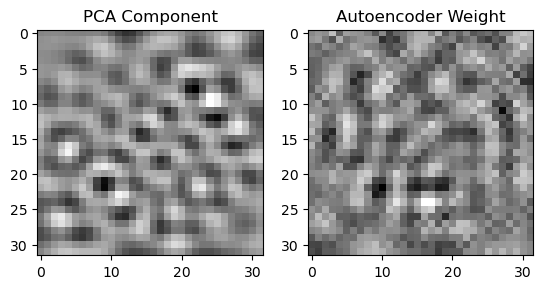

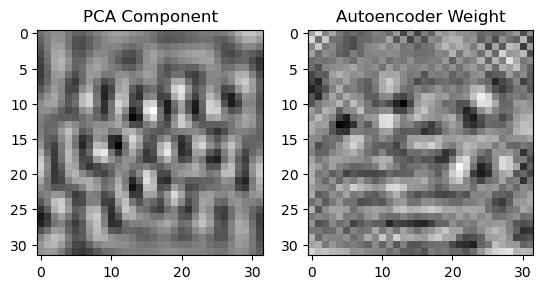

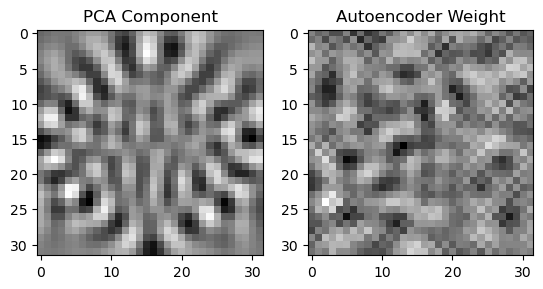

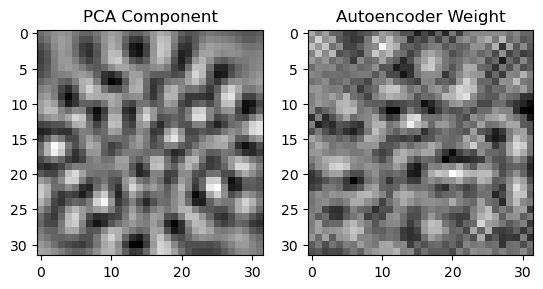

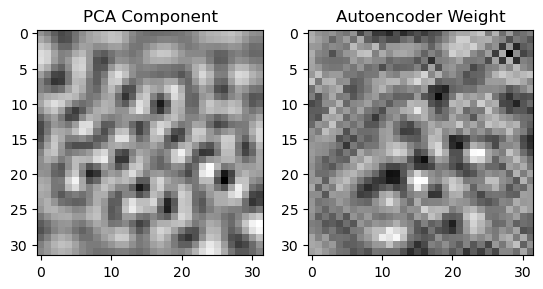

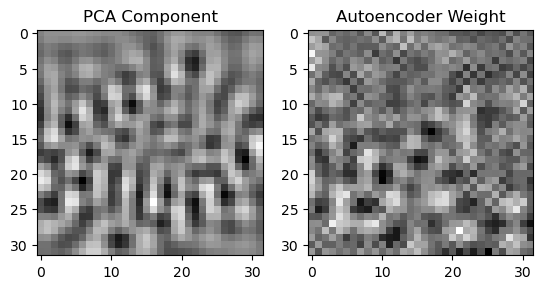

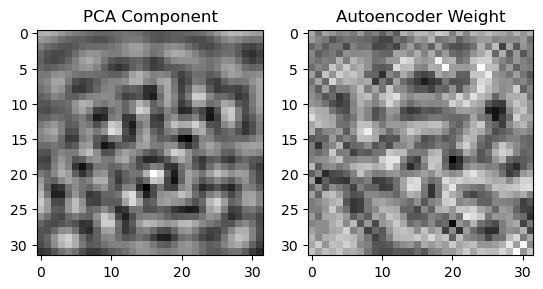

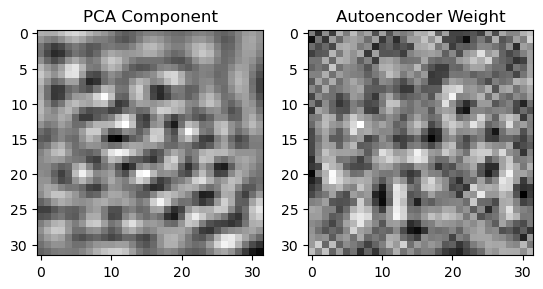

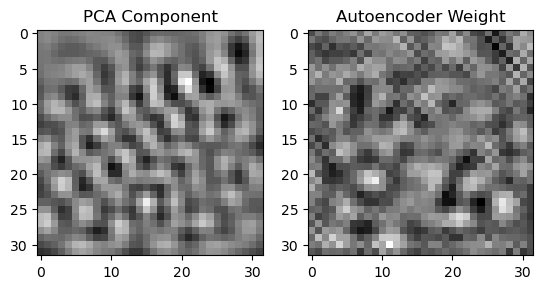

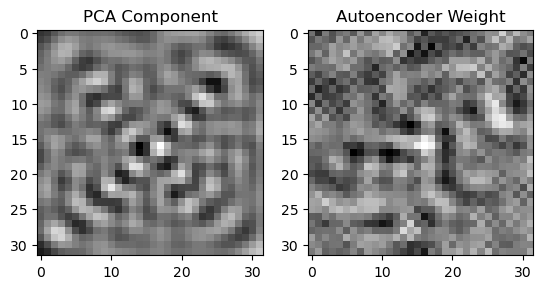

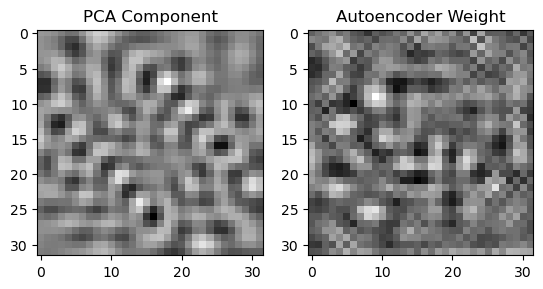

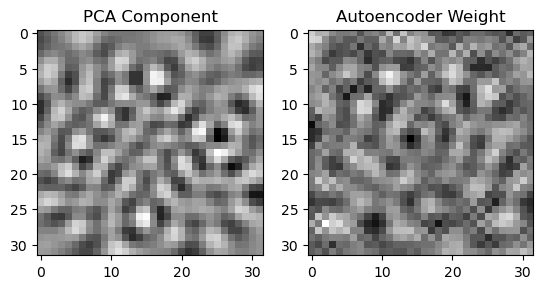

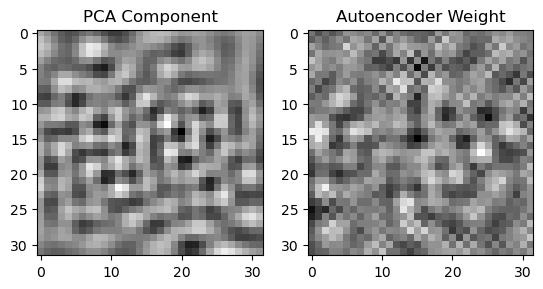

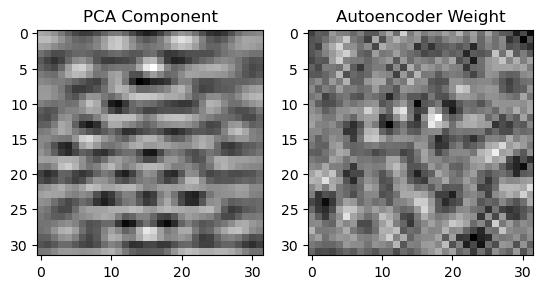

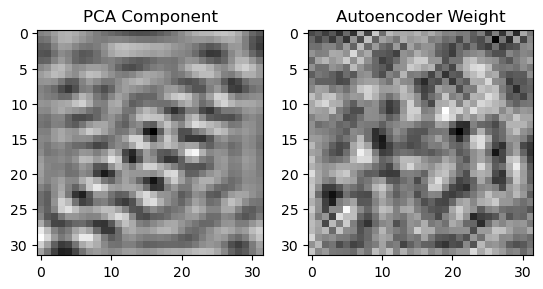

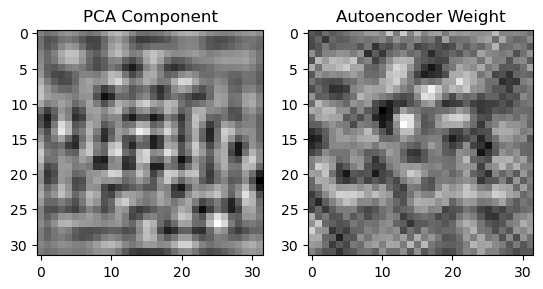

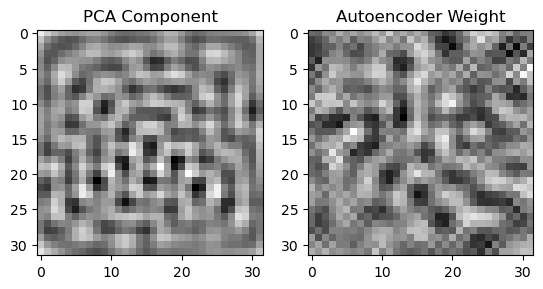

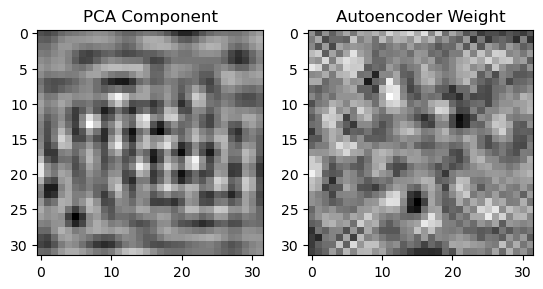

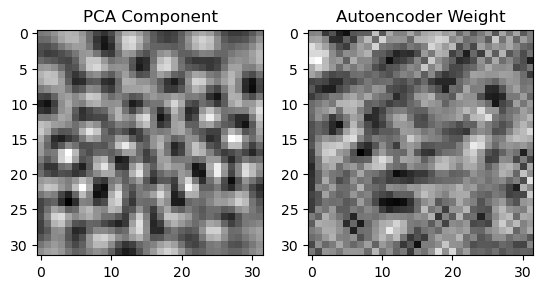

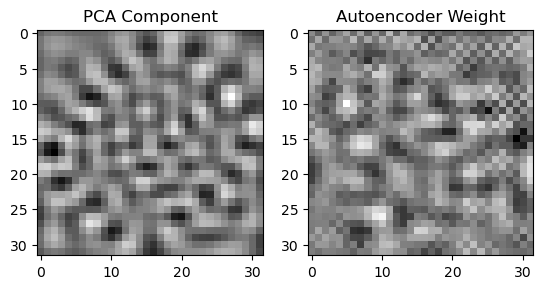

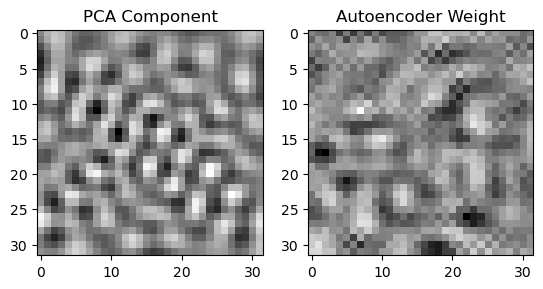

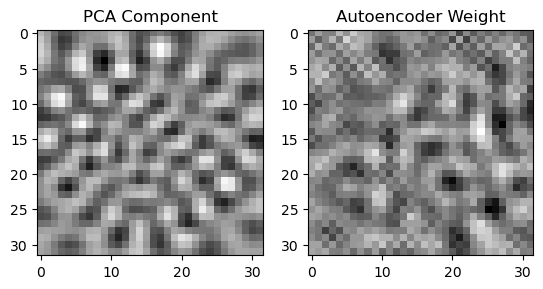

In [ ]:
# Get the learned weights (eigenvectors) from the encoder
autoencoder_weights = encoder.get_weights()[0]

# Compare with PCA eigenvectors
for i in range(min(autoencoder_weights.shape[1], pca.components_.shape[0])):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(pca.components_[i].reshape(32, 32), cmap='gray')
    plt.title('PCA Component')

    plt.subplot(1, 2, 2)
    plt.imshow(autoencoder_weights[:, i].reshape(32, 32), cmap='gray')
    plt.title('Autoencoder Weight')

    plt.show()


Observations
Discuss how the autoencoder weights compare with the PCA eigenvectors.

# Task 3: Deep Convolutional Autoencoder
Step 1: Define and Train the Model
Define and train a deep convolutional autoencoder with the same dimension of the latent space.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(pca.n_components_, activation='linear')(x)

# Decoder
x = Dense(8 * 8 * 64, activation='relu')(encoded)
x = Reshape((8, 8, 64))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='linear', padding='same')(x)

conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder
conv_autoencoder.fit(x_train_gray[..., np.newaxis], x_train_gray[..., np.newaxis],
                     epochs=50,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test_gray[..., np.newaxis], x_test_gray[..., np.newaxis]))



Epoch 1/50
196/196 [==============================] - 94s 462ms/step - loss: 0.0228 - val_loss: 0.0104
Epoch 2/50
196/196 [==============================] - 80s 410ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 3/50
196/196 [==============================] - 80s 407ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 4/50
196/196 [==============================] - 90s 459ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 5/50
196/196 [==============================] - 83s 423ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 6/50
196/196 [==============================] - 101s 515ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 7/50
196/196 [==============================] - 89s 456ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 8/50
196/196 [==============================] - 84s 430ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/50
196/196 [==============================] - 83s 422ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 10/50
196/196 [==============================] - 79s 404ms/step -

Step 2: Calculate Reconstruction Error
Calculate the reconstruction error for the test dataset

In [ ]:
# Calculate reconstruction error
reconstructed_imgs = conv_autoencoder.predict(x_test_gray[..., np.newaxis])
reconstruction_error = np.mean((x_test_gray[..., np.newaxis] - reconstructed_imgs) ** 2)
print(f"Reconstruction error: {reconstruction_error:.4f}")


313/313 [==============================] - 7s 19ms/step
Reconstruction error: 0.0031


Step 3: Compare with Single Layer Autoencoder
Calculate and compare the reconstruction error with a single hidden layer autoencoder.

In [ ]:
# Single hidden layer autoencoder with sigmoid activation
input_img = Input(shape=(x_train_flat.shape[1],))
encoded = Dense(pca.n_components_, activation='sigmoid')(input_img)
decoded = Dense(x_train_flat.shape[1], activation='linear')(encoded)

single_autoencoder = Model(input_img, decoded)
single_autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder
single_autoencoder.fit(x_train_flat, x_train_flat,
                       epochs=50,
                       batch_size=256,
                       shuffle=True,
                       validation_data=(x_test_flat, x_test_flat))

# Calculate reconstruction error
reconstructed_imgs = single_autoencoder.predict(x_test_flat)
reconstruction_error_single = np.mean((x_test_flat - reconstructed_imgs) ** 2)
print(f"Single hidden layer autoencoder reconstruction error: {reconstruction_error_single:.4f}")


Epoch 1/50
196/196 [==============================] - 8s 33ms/step - loss: 0.4058 - val_loss: 0.2526
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 0.2111 - val_loss: 0.1825
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 0.1632 - val_loss: 0.1491
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 0.1379 - val_loss: 0.1303
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 0.1211 - val_loss: 0.1171
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 0.1100 - val_loss: 0.1059
Epoch 7/50
196/196 [==============================] - 4s 18ms/step - loss: 0.1006 - val_loss: 0.0987
Epoch 8/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0944 - val_loss: 0.0935
Epoch 9/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0891 - val_loss: 0.0880
Epoch 10/50
196/196 [==============================] - 3s 17ms/step - loss: 0.0842 - val_lo

Step 4: Three Hidden Layer Autoencoder
Train a three hidden layer autoencoder and calculate the reconstruction error.

In [ ]:
# Three hidden layer autoencoder with approximately equal hidden nodes
hidden_nodes = pca.n_components_ // 3

input_img = Input(shape=(x_train_flat.shape[1],))
encoded = Dense(hidden_nodes, activation='sigmoid')(input_img)
encoded = Dense(hidden_nodes, activation='sigmoid')(encoded)
encoded = Dense(hidden_nodes, activation='sigmoid')(encoded)
decoded = Dense(x_train_flat.shape[1], activation='linear')(encoded)

three_layer_autoencoder = Model(input_img, decoded)
three_layer_autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the autoencoder
three_layer_autoencoder.fit(x_train_flat, x_train_flat,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test_flat, x_test_flat))

# Calculate reconstruction error
reconstructed_imgs = three_layer_autoencoder.predict(x_test_flat)
reconstruction_error_three = np.mean((x_test_flat - reconstructed_imgs) ** 2)
print(f"Three hidden layer autoencoder reconstruction error: {reconstruction_error_three:.4f}")


Epoch 1/50
196/196 [==============================] - 8s 27ms/step - loss: 0.7582 - val_loss: 0.5821
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 0.5412 - val_loss: 0.5151
Epoch 3/50
196/196 [==============================] - 2s 9ms/step - loss: 0.4885 - val_loss: 0.4645
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4410 - val_loss: 0.4278
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4243 - val_loss: 0.4205
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4190 - val_loss: 0.4175
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4071 - val_loss: 0.3967
Epoch 8/50
196/196 [==============================] - 2s 11ms/step - loss: 0.3851 - val_loss: 0.3778
Epoch 9/50
196/196 [==============================] - 2s 12ms/step - loss: 0.3743 - val_loss: 0.3740
Epoch 10/50
196/196 [==============================] - 2s 12ms/step - loss: 0.3697 - val_los

# Task 4: Deep Convolutional Autoencoder with MNIST
Step 1: Import Libraries and Load MNIST Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



11490434/11490434 [==============================] - 0s 0us/step


Step 2: Define and Train the Deep Convolutional Autoencoder

In [ ]:
# Reshape data for convolutional layers
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.reshape(-1, 28, 28, 1)

# Build the autoencoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Flatten()(x)

# Decoder
x = Dense(7 * 7 * 64, activation='relu')(encoded)
x = Reshape((7, 7, 64))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

mnist_autoencoder = Model(input_img, decoded)
mnist_autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder
mnist_autoencoder.fit(x_train_reshaped, x_train_reshaped,
                      epochs=50,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test_reshaped, x_test_reshaped))



Epoch 1/50
235/235 [==============================] - 249s 1s/step - loss: 0.1324 - val_loss: 0.0823
Epoch 2/50
235/235 [==============================] - 248s 1s/step - loss: 0.0792 - val_loss: 0.0753
Epoch 3/50
235/235 [==============================] - 249s 1s/step - loss: 0.0745 - val_loss: 0.0728
Epoch 4/50
235/235 [==============================] - 248s 1s/step - loss: 0.0724 - val_loss: 0.0709
Epoch 5/50
235/235 [==============================] - 250s 1s/step - loss: 0.0711 - val_loss: 0.0699
Epoch 6/50
235/235 [==============================] - 248s 1s/step - loss: 0.0701 - val_loss: 0.0692
Epoch 7/50
235/235 [==============================] - 249s 1s/step - loss: 0.0694 - val_loss: 0.0690
Epoch 8/50
235/235 [==============================] - 250s 1s/step - loss: 0.0689 - val_loss: 0.0684
Epoch 9/50
235/235 [==============================] - 250s 1s/step - loss: 0.0684 - val_loss: 0.0687
Epoch 10/50
235/235 [==============================] - 246s 1s/step - loss: 0.0681 - val_lo

Step 3: Extract Features Using the Encoder

In [ ]:
# Extract the encoder part
encoder = Model(input_img, encoded)

# Get the encoded features for training and test sets
x_train_encoded = encoder.predict(x_train_reshaped)
x_test_encoded = encoder.predict(x_test_reshaped)

# Reshape for MLP input
x_train_encoded_flat = x_train_encoded.reshape(-1, x_train_encoded.shape[1])
x_test_encoded_flat = x_test_encoded.reshape(-1, x_test_encoded.shape[1])


313/313 [==============================] - 3s 9ms/step


Step 4: Define 7-Segment Representation and Train MLP Classifier

In [ ]:
# Define 7-segment representation
segment_representation = {
    0: [1, 1, 1, 1, 1, 1, 0],
    1: [0, 1, 1, 0, 0, 0, 0],
    2: [1, 1, 0, 1, 1, 0, 1],
    3: [1, 1, 1, 1, 0, 0, 1],
    4: [0, 1, 1, 0, 0, 1, 1],
    5: [1, 0, 1, 1, 0, 1, 1],
    6: [1, 0, 1, 1, 1, 1, 1],
    7: [1, 1, 1, 0, 0, 0, 0],
    8: [1, 1, 1, 1, 1, 1, 1],
    9: [1, 1, 1, 1, 0, 1, 1],
}

# Create target labels
y_train_segments = np.array([segment_representation[i] for i in y_train])
y_test_segments = np.array([segment_representation[i] for i in y_test])

# Define MLP Classifier
mlp = Sequential()
mlp.add(Dense(128, activation='relu', input_shape=(x_train_encoded_flat.shape[1],)))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dense(7, activation='sigmoid'))  # 7 segments for the LED representation

# Compile the model
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the MLP Classifier
mlp.fit(x_train_encoded_flat, y_train_segments, epochs=50, batch_size=256, validation_data=(x_test_encoded_flat, y_test_segments))



Epoch 1/50
235/235 [==============================] - 9s 27ms/step - loss: 0.1115 - accuracy: 0.2620 - val_loss: 0.0387 - val_accuracy: 0.1988
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0330 - accuracy: 0.2381 - val_loss: 0.0305 - val_accuracy: 0.3596
Epoch 3/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0235 - accuracy: 0.2729 - val_loss: 0.0224 - val_accuracy: 0.2605
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0179 - accuracy: 0.3069 - val_loss: 0.0190 - val_accuracy: 0.4139
Epoch 5/50
235/235 [==============================] - 5s 21ms/step - loss: 0.0147 - accuracy: 0.3166 - val_loss: 0.0168 - val_accuracy: 0.2555
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0122 - accuracy: 0.3087 - val_loss: 0.0158 - val_accuracy: 0.2786
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0104 - accuracy: 0.3018 - val_loss: 0.0156 - val_accuracy: 0.3080

Step 5: Evaluate the MLP Classifier and Generate Confusion Matrix

313/313 [==============================] - 2s 5ms/step


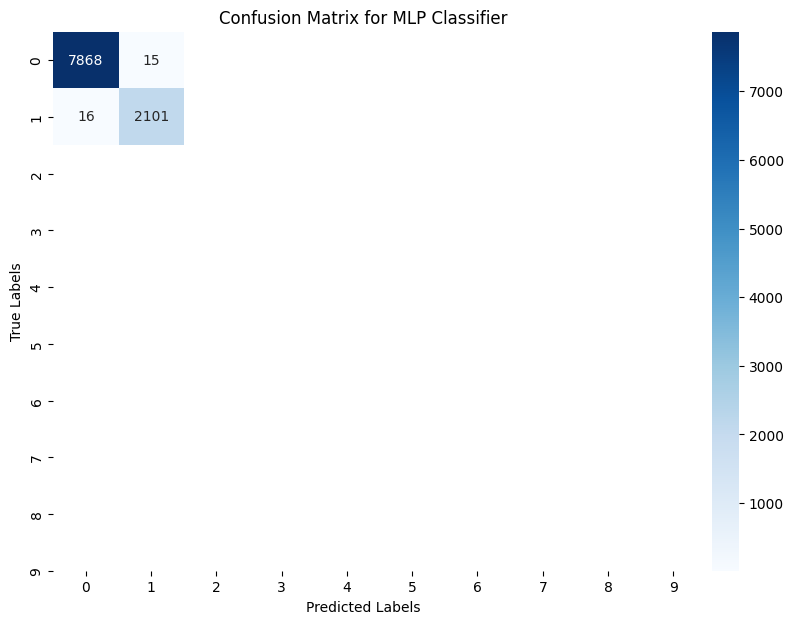

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the MLP
y_pred_segments = mlp.predict(x_test_encoded_flat)
y_pred_labels = (y_pred_segments > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test_segments.argmax(axis=1), y_pred_labels.argmax(axis=1))

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()
